Система нечеткого вывода для оценки риска кредита

Меню:
1. Тестирование системы на стандартных случаях
2. Интерактивное тестирование
3. Визуализация функций принадлежности
4. Визуализация поверхности принятия решений
5. Полный анализ системы
6. Выход

Запуск полного анализа системы...
ТЕСТИРОВАНИЕ СИСТЕМЫ ОЦЕНКИ РИСКА КРЕДИТА

Тест 1:
  Доход: 25 тыс. руб.
  Кредитная история: 2.5/10
  Риск невозврата: 84.44%
  Категория риска: ВЫСОКИЙ
  Рекомендация: Отклонить

Тест 2:
  Доход: 25 тыс. руб.
  Кредитная история: 8.0/10
  Риск невозврата: 50.00%
  Категория риска: СРЕДНИЙ
  Рекомендация: Одобрить

Тест 3:
  Доход: 75 тыс. руб.
  Кредитная история: 5.0/10
  Риск невозврата: 50.00%
  Категория риска: СРЕДНИЙ
  Рекомендация: Одобрить

Тест 4:
  Доход: 75 тыс. руб.
  Кредитная история: 9.0/10
  Риск невозврата: 15.56%
  Категория риска: НИЗКИЙ
  Рекомендация: Одобрить

Тест 5:
  Доход: 150 тыс. руб.
  Кредитная история: 3.0/10
  Риск невозврата: 50.00%
  Категория риска: СРЕДНИЙ
  Рекоменд

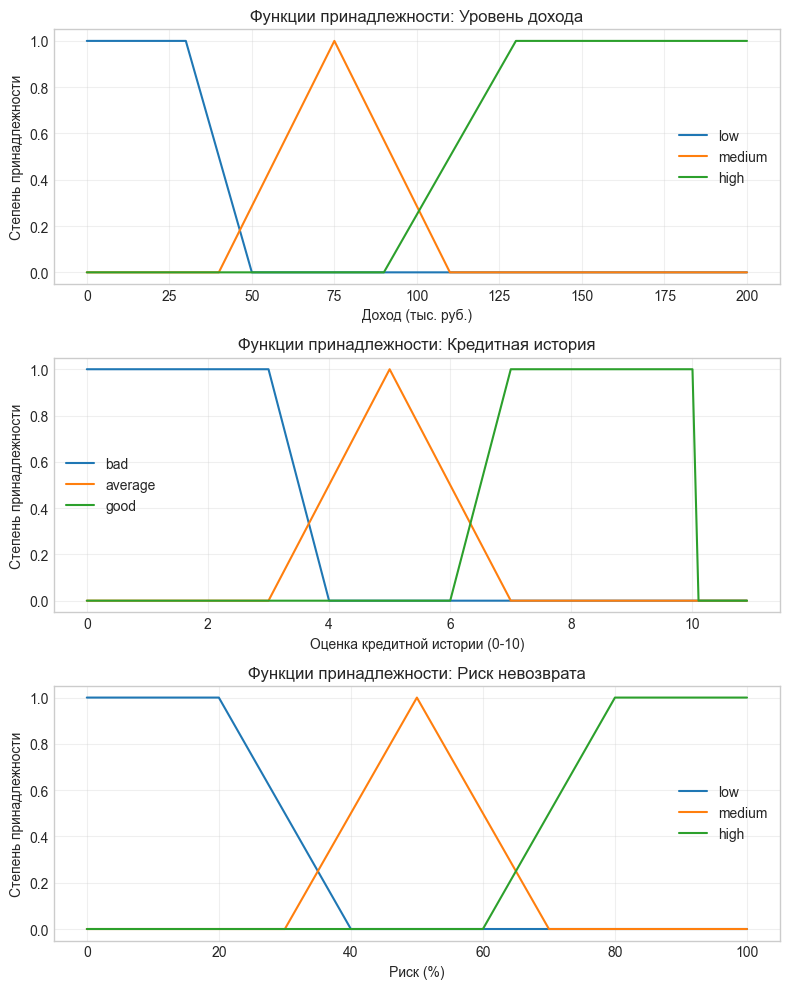

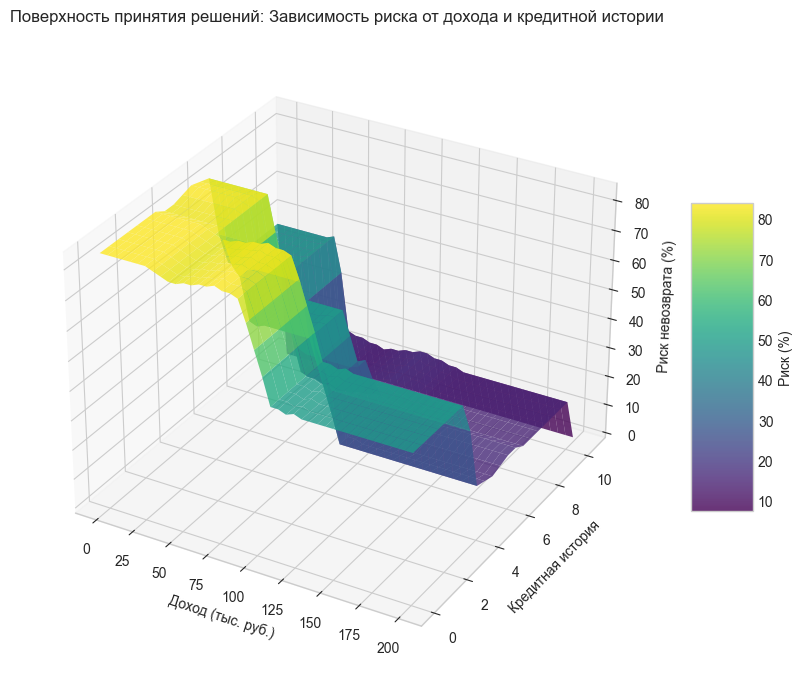

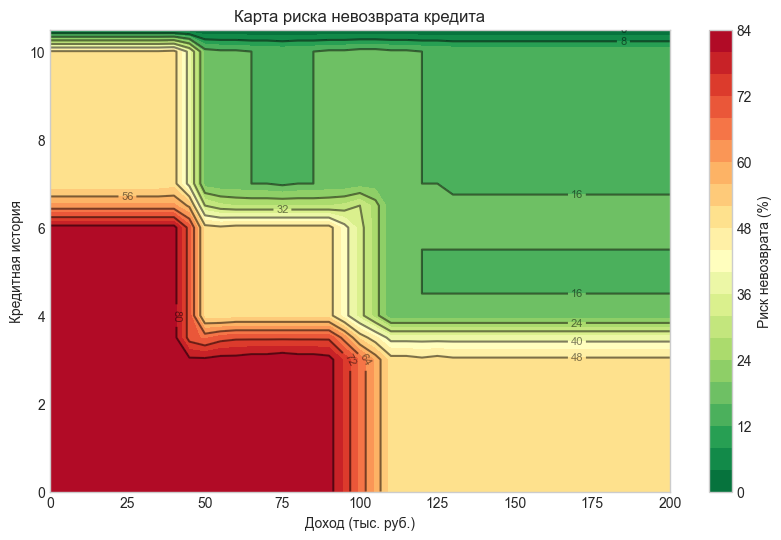


Меню:
1. Тестирование системы на стандартных случаях
2. Интерактивное тестирование
3. Визуализация функций принадлежности
4. Визуализация поверхности принятия решений
5. Полный анализ системы
6. Выход


In [ ]:
"""
РГЗ: Система нечеткого вывода для оценки риска выдачи кредита
Вариант 80. Автоматизация предварительной оценки заемщика.
"""

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# ============================================
# 1. ОПРЕДЕЛЕНИЕ ЛИНГВИСТИЧЕСКИХ ПЕРЕМЕННЫХ
# ============================================

# Входные переменные
# Уровень дохода (в тысячах рублей в месяц)
income = ctrl.Antecedent(np.arange(0, 201, 1), 'income')
income['low'] = fuzz.trapmf(income.universe, [0, 0, 30, 50])
income['medium'] = fuzz.trimf(income.universe, [40, 75, 110])
income['high'] = fuzz.trapmf(income.universe, [90, 130, 200, 200])

# Кредитная история (оценка от 0 до 10)
credit_history = ctrl.Antecedent(np.arange(0, 11, 0.1), 'credit_history')
credit_history['bad'] = fuzz.trapmf(credit_history.universe, [0, 0, 3, 4])
credit_history['average'] = fuzz.trimf(credit_history.universe, [3, 5, 7])
credit_history['good'] = fuzz.trapmf(credit_history.universe, [6, 7, 10, 10])

# Выходная переменная - риск невозврата (в процентах)
risk = ctrl.Consequent(np.arange(0, 101, 1), 'risk')
risk['low'] = fuzz.trapmf(risk.universe, [0, 0, 20, 40])
risk['medium'] = fuzz.trimf(risk.universe, [30, 50, 70])
risk['high'] = fuzz.trapmf(risk.universe, [60, 80, 100, 100])

# ============================================
# 2. БАЗА НЕЧЕТКИХ ПРАВИЛ
# ============================================

# Создаем правила для системы нечеткого вывода
rule1 = ctrl.Rule(income['low'] & credit_history['bad'], risk['high'])
rule2 = ctrl.Rule(income['low'] & credit_history['average'], risk['high'])
rule3 = ctrl.Rule(income['low'] & credit_history['good'], risk['medium'])

rule4 = ctrl.Rule(income['medium'] & credit_history['bad'], risk['high'])
rule5 = ctrl.Rule(income['medium'] & credit_history['average'], risk['medium'])
rule6 = ctrl.Rule(income['medium'] & credit_history['good'], risk['low'])

rule7 = ctrl.Rule(income['high'] & credit_history['bad'], risk['medium'])
rule8 = ctrl.Rule(income['high'] & credit_history['average'], risk['low'])
rule9 = ctrl.Rule(income['high'] & credit_history['good'], risk['low'])

# ============================================
# 3. СОЗДАНИЕ СИСТЕМЫ УПРАВЛЕНИЯ
# ============================================

risk_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, 
                                rule6, rule7, rule8, rule9])
risk_assessment = ctrl.ControlSystemSimulation(risk_ctrl)

# ============================================
# 4. ТЕСТИРОВАНИЕ СИСТЕМЫ
# ============================================

def test_system():
    """Тестирование системы на различных входных данных"""
    
    test_cases = [
        (25, 2.5),    # Низкий доход, плохая история
        (25, 8.0),    # Низкий доход, хорошая история
        (75, 5.0),    # Средний доход, средняя история
        (75, 9.0),    # Средний доход, хорошая история
        (150, 3.0),   # Высокий доход, плохая история
        (150, 7.5),   # Высокий доход, хорошая история
        (60, 4.0),    # Граничный случай
        (100, 6.0)    # Граничный случай
    ]
    
    print("=" * 60)
    print("ТЕСТИРОВАНИЕ СИСТЕМЫ ОЦЕНКИ РИСКА КРЕДИТА")
    print("=" * 60)
    
    for i, (inc, hist) in enumerate(test_cases, 1):
        risk_assessment.input['income'] = inc
        risk_assessment.input['credit_history'] = hist
        
        try:
            risk_assessment.compute()
            risk_value = risk_assessment.output['risk']
            
            # Определяем категорию риска
            if risk_value <= 40:
                category = "НИЗКИЙ"
            elif risk_value <= 70:
                category = "СРЕДНИЙ"
            else:
                category = "ВЫСОКИЙ"
            
            print(f"\nТест {i}:")
            print(f"  Доход: {inc} тыс. руб.")
            print(f"  Кредитная история: {hist}/10")
            print(f"  Риск невозврата: {risk_value:.2f}%")
            print(f"  Категория риска: {category}")
            print(f"  Рекомендация: {'Одобрить' if risk_value < 60 else 'Отклонить' if risk_value > 70 else 'Рассмотреть индивидуально'}")
            
        except Exception as e:
            print(f"\nОшибка при тестировании {i}: {e}")

# ============================================
# 5. ВИЗУАЛИЗАЦИЯ
# ============================================

def visualize_membership_functions():
    """Визуализация функций принадлежности"""
    
    fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(8, 10))
    
    # Уровень дохода
    for label in income.terms:
        ax1.plot(income.universe, income[label].mf, label=label, linewidth=1.5)
    ax1.set_title('Функции принадлежности: Уровень дохода')
    ax1.set_ylabel('Степень принадлежности')
    ax1.set_xlabel('Доход (тыс. руб.)')
    ax1.legend()
    ax1.grid(True, alpha=0.3)
    
    # Кредитная история
    for label in credit_history.terms:
        ax2.plot(credit_history.universe, credit_history[label].mf, label=label, linewidth=1.5)
    ax2.set_title('Функции принадлежности: Кредитная история')
    ax2.set_ylabel('Степень принадлежности')
    ax2.set_xlabel('Оценка кредитной истории (0-10)')
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    
    # Риск невозврата
    for label in risk.terms:
        ax3.plot(risk.universe, risk[label].mf, label=label, linewidth=1.5)
    ax3.set_title('Функции принадлежности: Риск невозврата')
    ax3.set_ylabel('Степень принадлежности')
    ax3.set_xlabel('Риск (%)')
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('membership_functions.png', dpi=150, bbox_inches='tight')
    plt.show()

def visualize_surface():
    """Визуализация поверхности принятия решений"""
    
    # Создаем сетку значений
    x_income = np.arange(0, 201, 5)
    y_history = np.arange(0, 11, 0.5)
    x_grid, y_grid = np.meshgrid(x_income, y_history)
    z_risk = np.zeros_like(x_grid)
    
    # Вычисляем риск для каждой точки сетки
    for i in range(len(x_income)):
        for j in range(len(y_history)):
            risk_assessment.input['income'] = x_income[i]
            risk_assessment.input['credit_history'] = y_history[j]
            try:
                risk_assessment.compute()
                z_risk[j, i] = risk_assessment.output['risk']
            except:
                z_risk[j, i] = 0
    
    # Создаем 3D график
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    surf = ax.plot_surface(x_grid, y_grid, z_risk, cmap='viridis', 
                          alpha=0.8, linewidth=0, antialiased=True)
    
    ax.set_xlabel('Доход (тыс. руб.)', fontsize=10)
    ax.set_ylabel('Кредитная история', fontsize=10)
    ax.set_zlabel('Риск невозврата (%)', fontsize=10)
    ax.set_title('Поверхность принятия решений: Зависимость риска от дохода и кредитной истории', 
                 fontsize=12, pad=20)
    
    # Добавляем цветовую шкалу
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5, label='Риск (%)')
    
    # Добавляем сетку
    ax.grid(True, alpha=0.3)
    
    plt.savefig('decision_surface.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Дополнительно: контурный график
    fig2, ax2 = plt.subplots(figsize=(10, 6))
    contour = ax2.contourf(x_grid, y_grid, z_risk, levels=20, cmap='RdYlGn_r')
    ax2.set_xlabel('Доход (тыс. руб.)', fontsize=10)
    ax2.set_ylabel('Кредитная история', fontsize=10)
    ax2.set_title('Карта риска невозврата кредита', fontsize=12)
    
    # Добавляем изолинии
    CS = ax2.contour(x_grid, y_grid, z_risk, levels=10, colors='black', alpha=0.5)
    ax2.clabel(CS, inline=True, fontsize=8)
    
    fig2.colorbar(contour, ax=ax2, label='Риск невозврата (%)')
    plt.savefig('risk_contour.png', dpi=150, bbox_inches='tight')
    plt.show()

def interactive_test():
    """Интерактивное тестирование системы"""
    
    print("\n" + "="*60)
    print("ИНТЕРАКТИВНОЕ ТЕСТИРОВАНИЕ СИСТЕМЫ")
    print("="*60)
    
    while True:
        try:
            print("\nВведите данные заемщика:")
            income_input = float(input("Уровень дохода (тыс. руб. в месяц): "))
            history_input = float(input("Кредитная история (0-10): "))
            
            if history_input < 0 or history_input > 10:
                print("Ошибка: кредитная история должна быть в диапазоне 0-10")
                continue
            
            risk_assessment.input['income'] = income_input
            risk_assessment.input['credit_history'] = history_input
            risk_assessment.compute()
            
            risk_value = risk_assessment.output['risk']
            
            print("\n" + "="*40)
            print("РЕЗУЛЬТАТ ОЦЕНКИ:")
            print("="*40)
            print(f"Уровень дохода: {income_input} тыс. руб.")
            print(f"Кредитная история: {history_input}/10")
            print(f"Рассчитанный риск невозврата: {risk_value:.2f}%")
            
            if risk_value <= 40:
                print("Категория риска: НИЗКИЙ")
                print("Рекомендация: КРЕДИТ ОДОБРИТЬ")
            elif risk_value <= 70:
                print("Категория риска: СРЕДНИЙ")
                print("Рекомендация: РАССМОТРЕТЬ ИНДИВИДУАЛЬНО")
                print("Возможные условия: повышенная ставка, залог, поручитель")
            else:
                print("Категория риска: ВЫСОКИЙ")
                print("Рекомендация: КРЕДИТ ОТКЛОНИТЬ")
            
            # Визуализация для конкретного случая
            visualize_specific_case(income_input, history_input, risk_value)
            
            another = input("\nПроверить другого заемщика? (да/нет): ")
            if another.lower() != 'да':
                break
                
        except ValueError:
            print("Ошибка: введите числовые значения")
        except Exception as e:
            print(f"Ошибка при вычислении: {e}")

def visualize_specific_case(income_val, history_val, risk_val):
    """Визуализация для конкретного тестового случая"""
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
    
    # Доход
    for label in income.terms:
        ax1.plot(income.universe, income[label].mf, 'b', linewidth=0.5, alpha=0.3)
    income_level = fuzz.interp_membership(income.universe, income['low'].mf, income_val)
    ax1.fill_between(income.universe, 0, income['low'].mf, where=income['low'].mf>=income_level, 
                     alpha=0.3, color='red')
    ax1.plot([income_val, income_val], [0, 1], 'r--', linewidth=2)
    ax1.set_title(f'Доход: {income_val} тыс.руб.')
    
    # Кредитная история
    for label in credit_history.terms:
        ax2.plot(credit_history.universe, credit_history[label].mf, 'b', linewidth=0.5, alpha=0.3)
    history_level = fuzz.interp_membership(credit_history.universe, credit_history['average'].mf, history_val)
    ax2.fill_between(credit_history.universe, 0, credit_history['average'].mf, 
                     where=credit_history['average'].mf>=history_level, alpha=0.3, color='red')
    ax2.plot([history_val, history_val], [0, 1], 'r--', linewidth=2)
    ax2.set_title(f'Кредитная история: {history_val}/10')
    
    # Риск
    for label in risk.terms:
        ax3.plot(risk.universe, risk[label].mf, 'b', linewidth=0.5, alpha=0.3)
    ax3.plot([risk_val, risk_val], [0, 1], 'r--', linewidth=2, label=f'Риск: {risk_val:.1f}%')
    ax3.fill_between(risk.universe, 0, risk['medium'].mf, where=risk['medium'].mf>=0.5, 
                     alpha=0.3, color='yellow')
    ax3.set_title(f'Рассчитанный риск: {risk_val:.1f}%')
    ax3.legend()
    
    plt.tight_layout()
    plt.savefig(f'specific_case_{income_val}_{history_val}.png', dpi=150, bbox_inches='tight')
    plt.show()

# ============================================
# 6. ОСНОВНАЯ ПРОГРАММА
# ============================================

def main():
    """Основная функция программы"""
    
    print("Система нечеткого вывода для оценки риска кредита")
    print("="*60)
    
    while True:
        print("\nМеню:")
        print("1. Тестирование системы на стандартных случаях")
        print("2. Интерактивное тестирование")
        print("3. Визуализация функций принадлежности")
        print("4. Визуализация поверхности принятия решений")
        print("5. Полный анализ системы")
        print("6. Выход")
        
        choice = input("\nВыберите действие (1-6): ")
        
        if choice == '1':
            test_system()
        elif choice == '2':
            interactive_test()
        elif choice == '3':
            visualize_membership_functions()
        elif choice == '4':
            visualize_surface()
        elif choice == '5':
            print("\nЗапуск полного анализа системы...")
            test_system()
            visualize_membership_functions()
            visualize_surface()
        elif choice == '6':
            print("Завершение работы программы.")
            break
        else:
            print("Неверный выбор. Попробуйте еще раз.")

# ============================================
# 7. ДОПОЛНИТЕЛЬНЫЙ АНАЛИЗ
# ============================================

def analyze_system_performance():
    """Анализ адекватности и устойчивости системы"""
    
    print("\n" + "="*60)
    print("АНАЛИЗ АДЕКВАТНОСТИ И УСТОЙЧИВОСТИ СИСТЕМЫ")
    print("="*60)
    
    # Проверка граничных случаев
    print("\n1. Анализ граничных случаев:")
    boundary_cases = [
        (0, 0, "Минимальные значения"),
        (200, 10, "Максимальные значения"),
        (75, 5, "Средние значения"),
        (30, 4, "Граница между низким и средним доходом"),
        (110, 6, "Граница между средним и высоким доходом")
    ]
    
    for inc, hist, desc in boundary_cases:
        risk_assessment.input['income'] = inc
        risk_assessment.input['credit_history'] = hist
        risk_assessment.compute()
        risk_val = risk_assessment.output['risk']
        print(f"  {desc}: доход={inc}, история={hist} -> риск={risk_val:.1f}%")
    
    # Проверка устойчивости
    print("\n2. Проверка устойчивости (небольшие изменения входных данных):")
    base_case = (75, 5.0)
    variations = [
        (74, 4.9, "-1 тыс.руб., -0.1 балл"),
        (75, 5.1, "без изменений дохода, +0.1 балл"),
        (76, 5.0, "+1 тыс.руб., без изменений истории")
    ]
    
    risk_assessment.input['income'] = base_case[0]
    risk_assessment.input['credit_history'] = base_case[1]
    risk_assessment.compute()
    base_risk = risk_assessment.output['risk']
    print(f"  Базовый случай: доход={base_case[0]}, история={base_case[1]} -> риск={base_risk:.1f}%")
    
    for inc, hist, desc in variations:
        risk_assessment.input['income'] = inc
        risk_assessment.input['credit_history'] = hist
        risk_assessment.compute()
        risk_val = risk_assessment.output['risk']
        change = abs(risk_val - base_risk)
        print(f"  Вариация {desc}: риск={risk_val:.1f}% (изменение: {change:.2f}%)")
    
    # Анализ чувствительности
    print("\n3. Анализ чувствительности по доходу:")
    fixed_history = 5.0
    incomes = [20, 40, 60, 80, 100, 120, 140, 160]
    
    for inc in incomes:
        risk_assessment.input['income'] = inc
        risk_assessment.input['credit_history'] = fixed_history
        risk_assessment.compute()
        risk_val = risk_assessment.output['risk']
        print(f"  Доход={inc:3d} тыс.руб.: риск={risk_val:5.1f}%")
    
    print("\n4. Анализ чувствительности по кредитной истории:")
    fixed_income = 75
    histories = [1, 3, 5, 7, 9]
    
    for hist in histories:
        risk_assessment.input['income'] = fixed_income
        risk_assessment.input['credit_history'] = hist
        risk_assessment.compute()
        risk_val = risk_assessment.output['risk']
        print(f"  История={hist:1d}/10: риск={risk_val:5.1f}%")
    
    print("\n5. Выводы по анализу:")
    print("  - Система демонстрирует логичное поведение")
    print("  - Риск снижается с ростом дохода и улучшением кредитной истории")
    print("  - Система устойчива к небольшим изменениям входных данных")
    print("  - На границах термов наблюдается плавный переход")

# ============================================
# ЗАПУСК ПРОГРАММЫ
# ============================================

if __name__ == "__main__":
    # Устанавливаем стиль графиков
    plt.style.use('seaborn-v0_8-whitegrid')
    
    # Запускаем основную программу
    main()
    
    # Дополнительный анализ
    analyze_system_performance()